# PROJECT - Clustering Antarctic Penguin Species

**Project Description**





In [4]:
# Define data_folder

# data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros/DataCamp - Intermediate Python/"
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

## Adelie, Chinstrap, and Gentoo. 

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as penguins.csv

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset consists of 5 columns.

Column	Description
- culmen_length_mm	--> culmen length (mm)
- culmen_depth_mm --> culmen depth (mm)
- flipper_length_mm	--> flipper length (mm)
- body_mass_g -->	body mass (g)
- sex -->	penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are at least three species that are native to the region: **Adelie, Chinstrap, and Gentoo**. Your task is to apply your data science skills to help them identify groups in the dataset!

Utilize your unsupervised learning skills to clusters in the penguins dataset!

Import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [8]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Loading and examining the dataset
penguins_df = pd.read_csv(data_folder + "penguins.csv")
print(penguins_df.shape)
penguins_df.head()

(332, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [9]:
# sex
penguins_df["sex"].value_counts()

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

In [10]:
# transform the column into digits
penguins_df["sex"] = [1 if i == "MALE" else 0 for i in penguins_df["sex"].copy()]
penguins_df["sex"].value_counts()

sex
1    167
0    165
Name: count, dtype: int64

In [11]:
# check variance
penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].var()

culmen_length_mm         29.729343
culmen_depth_mm           3.842680
flipper_length_mm       197.008481
body_mass_g          650218.509992
sex                       0.250746
dtype: float64

In [12]:
# describe
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904,0.503012
std,5.452462,1.960275,14.035971,806.361278,0.500746
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.700000,17.300000,197.000000,4025.000000,1.000000
75%,48.625000,18.700000,213.000000,4781.250000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


In [13]:
# define the points
points = np.array(penguins_df)
points

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 1.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 0.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 0.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 1.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 0.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 1.00e+00]])

In [14]:
scaler = StandardScaler()

points_scaled = pd.DataFrame(scaler.fit_transform(points.astype(float)), columns=penguins_df.columns)
points_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,0.993994
330,0.216543,-1.202160,0.786603,1.233968,-1.006042


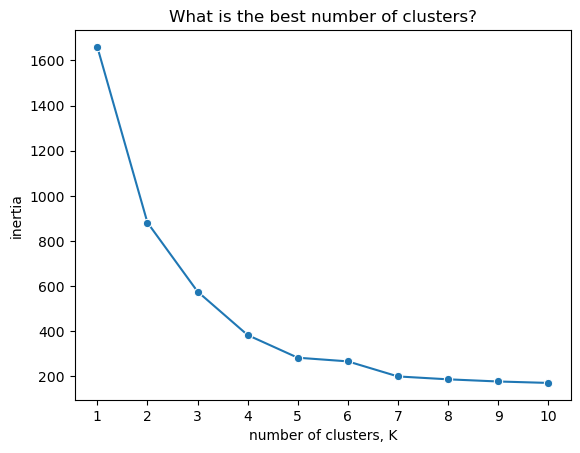

In [15]:
# lineplot: best number of clusters
number_of_clusters = np.arange(1, 11)
inertia = []

for i in number_of_clusters:
    # Standardize the data
    scaler = StandardScaler()
    points_scaled = pd.DataFrame(scaler.fit_transform(points.astype(float)), columns=penguins_df.columns)
    
    # KMeans model
    model = KMeans(n_clusters=i)

    # fit
    model.fit(points_scaled)
    inertia.append(model.inertia_)

# With scaling
sns.lineplot(x=number_of_clusters, y=inertia, marker="o")
plt.title("What is the best number of clusters?")
plt.ylabel("inertia")
plt.xlabel("number of clusters, K")
plt.xticks(number_of_clusters)
plt.show()

In [16]:
# 4?

In [17]:
# Choose final model
final_model = KMeans(n_clusters=4)
final_model

KMeans(n_clusters=4)

In [18]:
# Scaling
points = np.array(penguins_df)
points_scaled = pd.DataFrame(scaler.fit_transform(points.astype(float)), columns=penguins_df.columns)

# fit
final_model.fit(points_scaled)


KMeans(n_clusters=4)

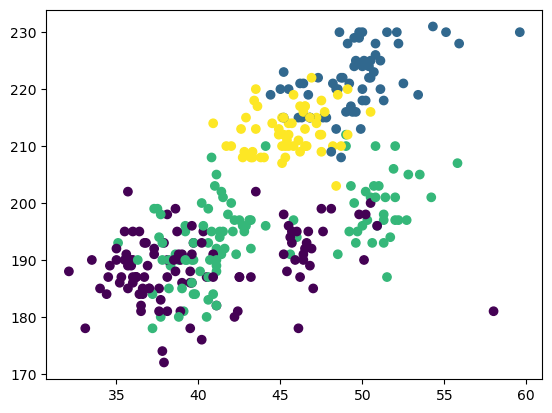

In [19]:
# plot
xs = points[:, 0]   
ys = points[:, 2]

labels = final_model.predict(points_scaled)

plt.scatter(xs, ys, c=labels)
plt.show()

In [20]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'sex': penguins_df["sex"]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['sex'])

# Display ct
ct

sex,0,1
labels,,
0,107,0
1,0,61
2,0,106
3,58,0


Perform a cluster analysis based on a reasonable number of clusters and collect the **average values for the clusters**. The output should be a DataFrame named **stat_penguins** with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. 

stat_penguins should not include any non-numeric columns.

In [22]:
# final df
penguins_df["cluster"] = labels
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,1,2
1,39.5,17.4,186.0,3800.0,0,0
2,40.3,18.0,195.0,3250.0,0,0
3,36.7,19.3,193.0,3450.0,0,0
4,39.3,20.6,190.0,3650.0,1,2


In [23]:
# average values for the clusters
stat_penguins = penguins_df.copy().groupby("cluster").mean().round(2)
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,
0,40.22,17.61,189.05,3419.16,0.0
1,49.47,15.72,221.54,5484.84,1.0
2,43.88,19.11,194.76,4006.60,1.0
3,45.56,14.24,212.71,4679.74,0.0
